In [1]:
import sys
from RF_class import RF_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from glob import glob

model = RF_model(docking_column="Affinity(kcal/mol)")

In [2]:
# hyper_params = {}
# hyper_params['n_estimators'] = [20, 51, 82, 113, 144, 175, 206, 237, 268, 300]
# hyper_params['max_features'] = ['sqrt', 'log2']
# hyper_params['max_depth'] = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# hyper_params['min_samples_split'] = [2, 5, 10]
# hyper_params['min_samples_leaf'] = [1, 2, 4]

hyper_params = {'rf__n_estimators': [150],
                'rf__max_features': ['sqrt'],
                'rf__max_depth':  [25],
                'rf__min_samples_split': [2],
                'rf__min_samples_leaf': [3]}

In [3]:
training_path = '/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/training_data/'
targs_df = pd.read_csv(training_path+'dock/new_ChEMBL_docking_df.csv', index_col='ID')
targs = targs_df['Affinity(kcal/mol)']
targs
feats_df = pd.read_csv(training_path+'desc/rdkit/ChEMBL_rdkit_desc_1.csv.gz', index_col='ID', compression='gzip')
save_path='/users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0'

In [4]:
falsetargs = targs_df[targs_df['Affinity(kcal/mol)']=="False"]
targs=targs.drop(index=falsetargs.index)

In [5]:
same_value_columns = feats_df.columns[~feats_df.apply(lambda col: col.nunique() == 1)]
df = feats_df[same_value_columns]
df = df.drop(index=falsetargs.index)

Performing resample 1
Performing resample 17
Performing resample 5
Performing resample 25
Performing resample 23
Performing resample 3
Performing resample 7
Performing resample 43
Performing resample 9
Performing resample 19
Performing resample 47
Performing resample 33
Performing resample 31
Performing resample 21
Performing resample 29
Performing resample 27
Performing resample 11
Performing resample 45
Performing resample 15
Performing resample 41
Performing resample 35
Performing resample 13
Performing resample 39
Performing resample 49
Performing resample 37
Performing resample 2
Performing resample 18
Performing resample 34
Performing resample 44
Performing resample 22
Performing resample 20
Performing resample 26
Performing resample 16
Performing resample 50
Performing resample 30
Performing resample 8
Performing resample 10
Performing resample 6
Performing resample 38
Performing resample 36
Performing resample 48
Performing resample 4
Performing resample 32
Performing resample 

(RandomForestRegressor(max_depth=25, max_features='sqrt', min_samples_leaf=3,
                       n_estimators=150),
 {'rf__max_depth': 25,
  'rf__max_features': 'sqrt',
  'rf__min_samples_leaf': 3,
  'rf__min_samples_split': 2,
  'rf__n_estimators': 150},
 {'Bias': -0.0002,
  'SDEP': 0.4289,
  'MSE': 0.1853,
  'RMSE': 0.4299,
  'r2': 0.7629},
               Feature  Importance
 74         SlogP_VSA4    0.061673
 94        VSA_EState4    0.048114
 67           SMR_VSA7    0.044221
 117         RingCount    0.044150
 109  NumAromaticRings    0.035708
 ..                ...         ...
 148            fr_azo    0.000000
 154        fr_hdrzine    0.000000
 137            fr_N_O    0.000000
 172       fr_thiazole    0.000000
 155        fr_hdrzone    0.000000
 
 [175 rows x 2 columns],
 (ID
  CHEMBL4213494   -9.71
  CHEMBL3586724   -8.49
  CHEMBL3786559   -9.77
  CHEMBL4083416   -7.41
  CHEMBL4080905   -9.15
                   ... 
  CHEMBL4169634   -8.46
  CHEMBL4099702   -8.04
  CHEMB

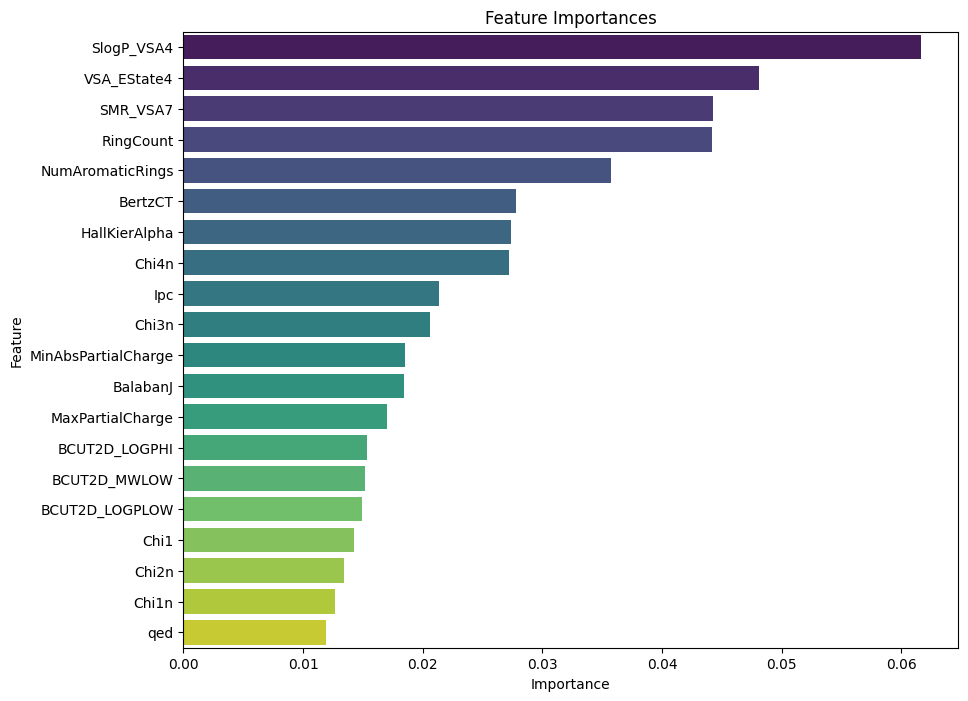

In [6]:
model.Train_Regressor(search_type='grid',
                      hyper_params=hyper_params,
                      features=df,
                      targets=targs,
                      save_path=save_path,
                      save_final_model=True,
                      plot_feat_importance=True)

In [8]:
training_path = '/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/training_data/'
targs_df = pd.read_csv(training_path+'dock/new_ChEMBL_docking_df.csv', index_col='ID')
CNN_targs = targs_df['CNN_affinity']
CNN_targs
feats_df = pd.read_csv(training_path+'desc/rdkit/ChEMBL_rdkit_desc_1.csv.gz', index_col='ID', compression='gzip')
save_path='/users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0'

Performing resample 31
Performing resample 33
Performing resample 35
Performing resample 37
Performing resample 39
Performing resample 41
Performing resample 43
Performing resample 45
Performing resample 47
Performing resample 49
Performing resample 1
Performing resample 3
Performing resample 7
Performing resample 19
Performing resample 5
Performing resample 11
Performing resample 9
Performing resample 13
Performing resample 15
Performing resample 25
Performing resample 21
Performing resample 17
Performing resample 27
Performing resample 29
Performing resample 23
Performing resample 38
Performing resample 34
Performing resample 48
Performing resample 36
Performing resample 26
Performing resample 6
Performing resample 50
Performing resample 8
Performing resample 46
Performing resample 40
Performing resample 20
Performing resample 2
Performing resample 42
Performing resample 16
Performing resample 4
Performing resample 28
Performing resample 10
Performing resample 22
Performing resample 

(RandomForestRegressor(max_depth=25, max_features='sqrt', min_samples_leaf=3,
                       n_estimators=150),
 {'rf__max_depth': 25,
  'rf__max_features': 'sqrt',
  'rf__min_samples_leaf': 3,
  'rf__min_samples_split': 2,
  'rf__n_estimators': 150},
 {'Bias': -0.0057,
  'SDEP': 0.2326,
  'MSE': 0.0545,
  'RMSE': 0.2332,
  'r2': 0.8624},
          Feature  Importance
 41           Ipc    0.054643
 31          Chi1    0.050309
 32         Chi1n    0.042977
 29         Chi0n    0.042609
 45     LabuteASA    0.038316
 ..           ...         ...
 150   fr_epoxide    0.000000
 148       fr_azo    0.000000
 169   fr_sulfide    0.000000
 154   fr_hdrzine    0.000000
 172  fr_thiazole    0.000000
 
 [175 rows x 2 columns],
 (ID
  CHEMBL4082235    6.418
  CHEMBL3220868    7.160
  CHEMBL3590401    7.053
  CHEMBL3780901    6.472
  CHEMBL4280151    6.006
                   ...  
  CHEMBL4241469    6.731
  CHEMBL4202675    7.471
  CHEMBL3234254    6.660
  CHEMBL4171109    7.847
  CHEMBL3

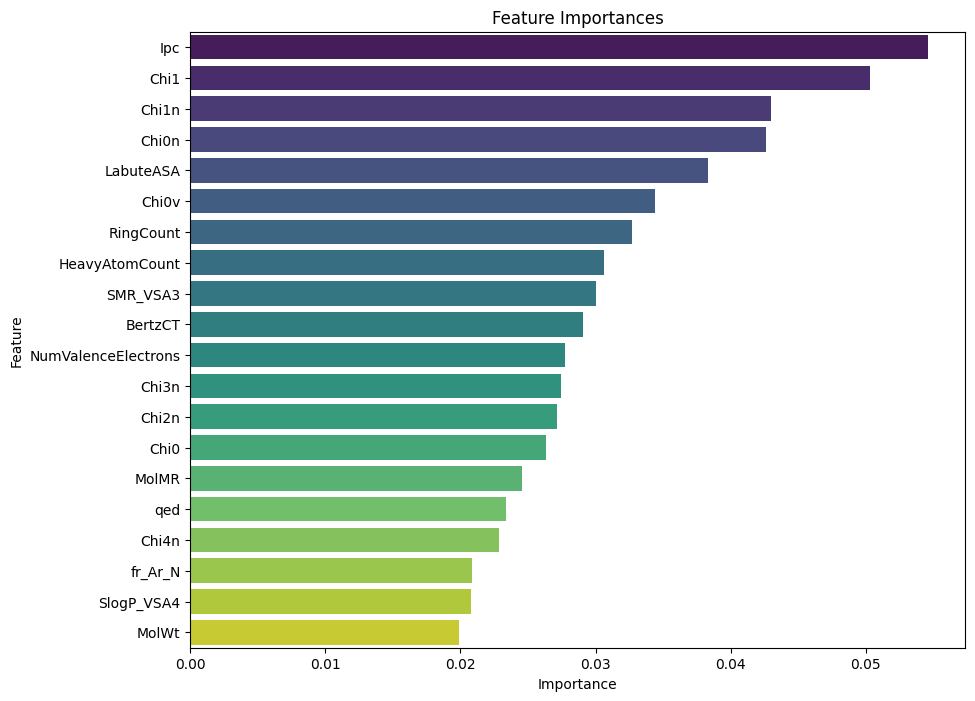

In [9]:
model.Train_Regressor(search_type='grid',
                      hyper_params=hyper_params,
                      features=df,
                      targets=CNN_targs,
                      save_path=save_path,
                      save_final_model=True,
                      plot_feat_importance=True)

In [10]:
preds = model.Predict(feats=feat_val, save_preds=False, calc_mpo=False)

NameError: name 'feat_val' is not defined

In [11]:
preds['affinity_pred']

ID
CHEMBL2349359    6.537525
CHEMBL3780381    6.157993
CHEMBL4098824    6.436147
CHEMBL4176830    6.363794
CHEMBL3780143    5.925956
                   ...   
CHEMBL4212636    6.982026
CHEMBL4203699    5.787139
CHEMBL4161994    6.369416
CHEMBL4167996    7.704312
CHEMBL4168214    6.345817
Name: affinity_pred, Length: 317, dtype: float64

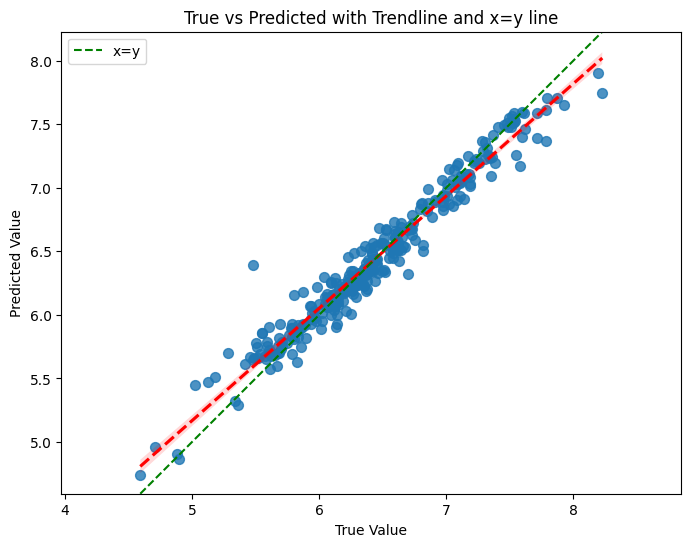

In [12]:
true = targ_val
pred = preds['affinity_pred']

data = pd.DataFrame({
    'True_Val': true,
    'Pred_Val': pred
    })

plt.figure(figsize=(8,6))

sns.regplot(x='True_Val',
            y='Pred_Val',---------------------------------------------------------------------------
_RemoteTraceback                          Traceback (most recent call last)
_RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 463, in _process_worker
    r = call_item()
  File "/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 291, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/joblib/parallel.py", line 598, in __call__
    return [func(*args, **kwargs)
  File "/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/joblib/parallel.py", line 598, in <listcomp>
    return [func(*args, **kwargs)
  File "/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py", line 299, in process_batch
    result = self._fit_model_and_evaluate(
  File "/users/yhb18174/Recreating_DMTA/scripts/models/RF_class.py", line 144, in _fit_model_and_evaluate
    feat_tr, feat_te, tar_tr, tar_te = train_test_split(
  File "/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/model_selection/_split.py", line 2780, in train_test_split
    n_train, n_test = _validate_shuffle_split(
  File "/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/model_selection/_split.py", line 2410, in _validate_shuffle_split
    raise ValueError(
ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.
"""

The above exception was the direct cause of the following exception:

ValueError                                Traceback (most recent call last)
/users/yhb18174/Recreating_DMTA/scripts/run/run_testing.ipynb Cell 4 line 1
----> 1 r = run.RunIterations(held_out_test_feats = '/users/yhb18174/Recreating_DMTA/datasets/held_out_data/PMG_held_out_desc.csv',
      2                       held_out_test_targs = '/users/yhb18174/Recreating_DMTA/datasets/held_out_data/PMG_held_out_docked.csv')

File ~/Recreating_DMTA/scripts/run/workflow_class.py:568, in RecDMTA.RunIterations(self, held_out_test_feats, held_out_test_targs)
    564 print(res)
    566 self.UpdateTrainingSet()
--> 568 self.RetrainAndPredict()
    570 # Renaming iteration directory
    571 rename_it_dir = Path(self.it_dir)

File ~/Recreating_DMTA/scripts/run/workflow_class.py:494, in RecDMTA.RetrainAndPredict(self)
    491 model = RF_model()
    493 # Training on updated features
--> 494 rf = model.Train_Regressor(search_type='grid',
    495                            hyper_params=self.hyper_params,
    496                            features=self.updated_feats,
    497                            targets=self.updated_targs,
    498                            save_path=self.it_dir,
    499                            save_final_model=True,
    500                            plot_feat_importance=True)
    502 self.it_rf_model = rf[0]
    504 # Setting up arguments for the _predict_for_files() function

File ~/Recreating_DMTA/scripts/models/RF_class.py:310, in RF_model.Train_Regressor(self, search_type, scoring, n_resamples, inner_cv_type, n_splits, test_size, hyper_params, features, targets, save_interval_models, save_path, save_final_model, plot_feat_importance, batch_size)
    307 batches = [range(i * batch_size, min((i + 1) * batch_size, n_resamples)) for i in range(n_batches)]
    309 # Multiprocessing the to process eatch batch
--> 310 results_batches = Parallel(n_jobs=40)(delayed(process_batch)(batch) for batch in batches)
    312 # Flattening the results into a single list
    313 results = [result for batch in results_batches for result in batch]

File ~/.conda/envs/phd_env/lib/python3.9/site-packages/joblib/parallel.py:2007, in Parallel.__call__(self, iterable)
   2001 # The first item from the output is blank, but it makes the interpreter
   2002 # progress until it enters the Try/Except block of the generator and
   2003 # reaches the first `yield` statement. This starts the asynchronous
   2004 # dispatch of the tasks to the workers.
   2005 next(output)
-> 2007 return output if self.return_generator else list(output)

File ~/.conda/envs/phd_env/lib/python3.9/site-packages/joblib/parallel.py:1650, in Parallel._get_outputs(self, iterator, pre_dispatch)
   1647     yield
   1649     with self._backend.retrieval_context():
-> 1650         yield from self._retrieve()
   1652 except GeneratorExit:
   1653     # The generator has been garbage collected before being fully
   1654     # consumed. This aborts the remaining tasks if possible and warn
   1655     # the user if necessary.
   1656     self._exception = True

File ~/.conda/envs/phd_env/lib/python3.9/site-packages/joblib/parallel.py:1754, in Parallel._retrieve(self)
   1747 while self._wait_retrieval():
   1748 
   1749     # If the callback thread of a worker has signaled that its task
   1750     # triggered an exception, or if the retrieval loop has raised an
   1751     # exception (e.g. `GeneratorExit`), exit the loop and surface the
   1752     # worker traceback.
   1753     if self._aborting:
-> 1754         self._raise_error_fast()
   1755         break
   1757     # If the next job is not ready for retrieval yet, we just wait for
   1758     # async callbacks to progress.

File ~/.conda/envs/phd_env/lib/python3.9/site-packages/joblib/parallel.py:1789, in Parallel._raise_error_fast(self)
   1785 # If this error job exists, immediately raise the error by
   1786 # calling get_result. This job might not exists if abort has been
   1787 # called directly or if the generator is gc'ed.
   1788 if error_job is not None:
-> 1789     error_job.get_result(self.timeout)

File ~/.conda/envs/phd_env/lib/python3.9/site-packages/joblib/parallel.py:745, in BatchCompletionCallBack.get_result(self, timeout)
    739 backend = self.parallel._backend
    741 if backend.supports_retrieve_callback:
    742     # We assume that the result has already been retrieved by the
    743     # callback thread, and is stored internally. It's just waiting to
    744     # be returned.
--> 745     return self._return_or_raise()
    747 # For other backends, the main thread needs to run the retrieval step.
    748 try:

File ~/.conda/envs/phd_env/lib/python3.9/site-packages/joblib/parallel.py:763, in BatchCompletionCallBack._return_or_raise(self)
    761 try:
    762     if self.status == TASK_ERROR:
--> 763         raise self._result
    764     return self._result
    765 finally:

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

plt.axis('equal')

# Determine axis limits
min_val = min(np.min(true), np.min(pred))
max_val = max(np.max(true), np.max(pred))
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.plot([min_val, max_val], [min_val, max_val], 'g--', label='x=y')

plt.legend()
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True vs Predicted with Trendline and x=y line')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

errors = true - pred


# Calculate performance metrics
bias = np.mean(errors)
sdep = (np.mean((true-pred-(np.mean(true-pred)))**2))**0.5
mse = mean_squared_error(true, pred)
rmse = np.sqrt(mse)
r2 = r2_score(true, pred)

In [14]:
print(bias)
print(sdep)
print(mse)
print(rmse)
print(r2)

0.0008306187837167053
0.13974472050299072
0.019529276836022857
0.13974718900937813
0.9518266429820669
